# 贷还是不贷：如何用Python和机器学习帮你决策？ - 简书

 https://www.jianshu.com/p/67a71e366516

### Preworks in Command Line - install packages 


Before you start, you need to install two libraries. 

1. 'graphviz'

    $ sudo apt install graphviz
    

2. 'PIL' - python image library 

    $ pip install -U PIL

### 1. loading data.

In [1]:
import pandas as pd

# pandas is a library for manipulating dataFrame. DataFrame is table. 


In [2]:
# use .read_csv() function of pandas to read csv file. 

csv_data = pd.read_csv('loans.csv')

In [3]:
type(csv_data)
# after reading by pandas, the csv file is transformed into a dataframe object. 

pandas.core.frame.DataFrame

In [4]:
csv_data.head()


,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0,-1
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0,-1
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0,-1
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0,-1
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0,-1


In [5]:
csv_data.shape


(46508, 13)

In [6]:
# .describe() show the describe information of the dataframe object (table). 
csv_data.describe()

,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,safe_loans
count,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000,46508.000000
mean,0.128645,6.343511,16.129507,0.586372,0.874989,55.964813,1.282769,0.004472
std,0.334810,3.750348,7.599843,0.492489,0.330735,25.526221,7.007558,1.000001
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,0.000000,3.000000,10.470000,0.000000,1.000000,37.700000,0.000000,-1.000000
50%,0.000000,6.000000,16.000000,1.000000,1.000000,58.400000,0.000000,1.000000
75%,0.000000,11.000000,21.600000,1.000000,1.000000,76.500000,0.000000,1.000000
max,1.000000,11.000000,38.130000,1.000000,1.000000,150.700000,208.820000,1.000000


In [7]:
# extract feature and target. 

# 'axis = 1'  是指第二个维度，即：列
csv_data_features = csv_data.drop('safe_loans', axis=1)

csv_data_targets = csv_data.safe_loans

In [8]:
csv_data_features.shape

(46508, 12)

In [9]:
csv_data_targets.shape

# 这里的逗号后面没有数字，指的是只有1列。

(46508,)

In [10]:
csv_data_features.head()

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,C,C4,1,1,RENT,1.00,car,60 months,1,1,9.4,0.0
1,F,F2,0,5,OWN,5.55,small_business,60 months,1,1,32.6,0.0
2,B,B5,1,1,RENT,18.08,other,60 months,1,1,36.5,0.0
3,C,C1,1,1,RENT,10.08,debt_consolidation,36 months,1,1,91.7,0.0
4,B,B2,0,4,RENT,7.06,other,36 months,1,1,55.5,0.0


In [11]:
csv_data_targets.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: safe_loans, dtype: int64

### 2. Transform data. make all the strings into numbers. 

In [12]:
# 使用LabelEncoder函数，把类别变成了数值
# LabelEncoder()：LabelEncoder 是对不连续的数字或者文本进行编号 

from sklearn.preprocessing import LabelEncoder

# create a real object of LabelEncoder
label_encoder = LabelEncoder()

# use the label_encoder object, define the transform function
transform_data = lambda x: label_encoder.fit_transform(x)

# start transform the data
csv_data_features_trans = csv_data_features.apply(transform_data)

# show the features after 
csv_data_features_trans.head()


,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee
0,2,13,1,1,3,97,0,1,1,1,107,0
1,5,26,0,5,2,552,9,1,1,1,349,0
2,1,9,1,1,3,1805,8,1,1,1,388,0
3,2,10,1,1,3,1005,2,0,1,1,952,0
4,1,6,0,4,3,703,8,0,1,1,583,0


### 3. Split data.

In [13]:
# split the data set into training set and test set. 
# use the train_test_split function

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(csv_data_features_trans, csv_data_targets, random_state=1)


/home/hanl9/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X_train.shape


(34881, 12)

In [15]:
X_test.shape

(11627, 12)

In [16]:
y_train.shape


(34881,)

In [17]:
y_test.shape

(11627,)

### 4. loading the model

In [18]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)


### 5. train the model

In [19]:

# after this step, the model will be generated
clf = clf.fit(X_train, y_train)


### 6. draw the module


or 

print('-'*100)

print('6. draw the module')

In [20]:
with open("safe-loans.dot", 'w') as f:
     f = tree.export_graphviz(clf,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = list(X_train),
                              class_names = ['not safe', 'safe'],
                              rounded = True,
                              filled= True )

        


In [21]:
# 我们是让Python调用一个Graphviz的命令，叫做dot，用它来把我们前面生成的 safe-loans.dot文件，转换成png格式的图片。

from subprocess import check_call
check_call(['dot','-Tpng','safe-loans.dot','-o','safe-loans.png'])


0

In [22]:
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont


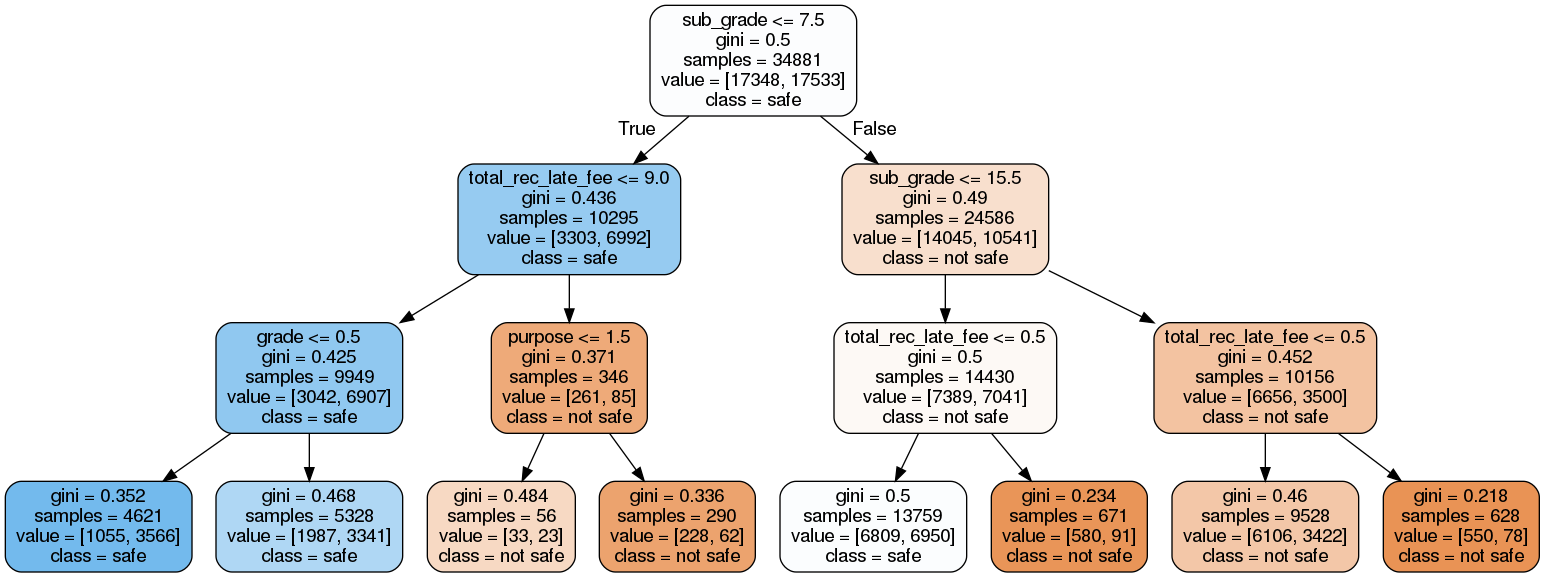

In [23]:
img = Image.open("safe-loans.png")
draw = ImageDraw.Draw(img)
img.save('output.png')
PImage("output.png")

### 7. test the module by using one data


In [24]:
# select the row indexted by 9
# : means all the data in that row. 

test_rec = X_test.iloc[9,:]


clf.predict([test_rec])


array([-1])

In [25]:
y_test.iloc[9]


-1

In [26]:
print('-'*100)

print('8. test the module by calculating the accuracy score')

----------------------------------------------------------------------------------------------------
8. test the module by calculating the accuracy score


In [27]:
# test the accuracy rate by the accuracy_score package.

from sklearn.metrics import accuracy_score

accuracy_score(y_test, clf.predict(X_test))


0.6161520598606691